<a href="https://colab.research.google.com/github/balasameeksha/DPFinalProject/blob/main/earthquake_New_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries

We will set up the environment for our analysis by importing the necessary libraries and loading the data we'll be working with.
Now we can use these libraries and functions for data preprocessing, feature engineering, modeling, and evaluation in our analysis.

In [ ]:
import numpy as np # Import NumPy for numerical computing
import pandas as pd # Import Pandas for working with dataframes
import matplotlib.pyplot as plt # Import Matplotlib for general visualizations
import matplotlib.ticker as mtick # Import Matplotlib's ticker module for customizing axis visuals
import seaborn as sns # Import Seaborn for statistical visualizations
from math import pi # Import the 'pi' constant for radar chart support
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold# Import feature selection technique for variance threshold
from sklearn.compose import ColumnTransformer # Import ColumnTransformer for applying transformations to specific columns
from sklearn.neighbors import KNeighborsClassifier # Import K-Nearest Neighbors classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix # Receiver Operating Characteristic - Area Under the Curve (ROC-AUC)
from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.simplefilter("ignore")

# Loading Required Files

Loading data from CSV files into DataFrames

In [ ]:
damage_assesment = pd.read_csv("csv_building_damage_assessment.csv",index_col = 'building_id')
building_ownership = pd.read_csv("csv_building_ownership_and_use.csv",index_col = 'building_id')
building_structure = pd.read_csv("csv_building_structure.csv",index_col = 'building_id')
mapping = pd.read_csv("mapping.csv")
ward_vdcmun = pd.read_csv("ward_vdcmun_district_name_mapping.csv")

## Damage Assesment Dataset Post Earthquake

In [ ]:
damage_assesment.head()

,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,...,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),...,0.0,0.0,0.0,0,0,0,0,0,0,0
120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),...,0.0,0.0,0.0,0,0,0,0,0,0,0
120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,...,0.0,0.0,0.0,0,0,0,0,0,0,0
120101000041,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,...,0.0,0.0,0.0,0,0,0,0,0,0,0
120101000051,12,1207,120703,Insignificant/light,None,None,NaN,NaN,Insignificant/light-(<1/3),NaN,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
damage_assesment.shape

(762106, 78)

In [ ]:
damage_assesment.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'damage_overall_collapse',
       'damage_overall_leaning', 'damage_overall_adjacent_building_risk',
       'damage_foundation_severe', 'damage_foundation_moderate',
       'damage_foundation_insignificant', 'damage_roof_severe',
       'damage_roof_moderate', 'damage_roof_insignificant',
       'damage_corner_separation_severe', 'damage_corner_separation_moderate',
       'damage_corner_separation_insignificant',
       'damage_diagonal_cracking_severe', 'damage_diagonal_cracking_moderate',
       'damage_diagonal_cracking_insignificant',
       'damage_in_plane_failure_severe', 'damage_in_plane_failure_moderate',
       'damage_in_plane_failure_insignificant',
       'damage_out_of_plane_failure_severe',
       'damage_out_of_plane_failure_moderate',
       'damage_out_of_plane_failure_insignificant',
       'damage_out_of_plane_failure_walls_ncfr_severe',
       'damage_out_of_plane_failure_walls_ncfr_moderate',
       'damage_out_of_pla

The damage assesment dataset contains 78 columns which demonstrate indepth information on the damage of the foundation, roof, staircases and so on. Since we are focusing on the overall damage of the building we will pick only the columns that are required.

In [ ]:
damage_assesment_modified = damage_assesment[['district_id', 'vdcmun_id', 'ward_id',
       'damage_overall_collapse', 'damage_overall_leaning',
       'damage_overall_adjacent_building_risk']]
damage_assesment_modified.shape

(762106, 6)

From the damage_assesment dataset we have pick only relevent columns for our analysis

## Building Ownership And Secondary Use Dataset

In [ ]:
building_ownership.head()

,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
building_ownership.shape

(762106, 16)

In [ ]:
building_ownership.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

## Building Structure Pre And Post Earthquake dataset

In [ ]:
building_structure.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
building_structure.shape

(762106, 30)

In [ ]:
building_structure.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

## Mapping Dataset

In [ ]:
mapping.head()

,individual_id,household_id,building_id
0,12010200004101001,12010200004101,120102000041
1,12010200004101002,12010200004101,120102000041
2,12010200004101003,12010200004101,120102000041
3,12010200004101004,12010200004101,120102000041
4,12010200004101005,12010200004101,120102000041


## Ward And District Name Mapping Dataset

In [ ]:
ward_vdcmun.head()

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga


# Data Pre-Processing

In [ ]:
damage_assesment_modified.head()

,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk
building_id,,,,,,
120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None
120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light
120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy
120101000041,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy
120101000051,12,1207,120703,Insignificant/light,None,None


In [ ]:
building_ownership.head()

,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
building_structure.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
damage_merged_df = building_structure.merge(damage_assesment_modified, on='building_id', how='inner').merge(building_ownership, on='building_id', how='inner')

We have merged 3 datasets namely Damage Assesment, Building Structure and Building Ownership

In [ ]:
damage_merged_df.head()

,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,0,0,0,0,0,0,0
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,0,0,0,0,0,0,0
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
damage_merged_df.columns

Index(['district_id_x', 'vdcmun_id_x', 'ward_id_x', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'damage_overall_collapse',
       'damage_overall_leaning', 'damage_overall_adjacent_building_risk',
   

In [ ]:
damage_merged_df.drop(columns=['district_id_x', 'vdcmun_id_x', 'ward_id_x', 'district_id_y', 'vdcmun_id_y', 'ward_id_y'], inplace=True)

In [ ]:
damage_merged_df.shape

(762106, 46)

We have merged three dataframe in this dataset which as can be seen from below has 762k rows and 46 columns of information, one of the fields is our target variable which is called 'damage_grade'.

In [ ]:
damage_merged_df.isnull().sum()

count_floors_pre_eq                            0
count_floors_post_eq                           0
age_building                                   0
plinth_area_sq_ft                              0
height_ft_pre_eq                               0
height_ft_post_eq                              0
land_surface_condition                         0
foundation_type                                0
roof_type                                      0
ground_floor_type                              0
other_floor_type                               0
position                                       1
plan_configuration                             1
has_superstructure_adobe_mud                   0
has_superstructure_mud_mortar_stone            0
has_superstructure_stone_flag                  0
has_superstructure_cement_mortar_stone         0
has_superstructure_mud_mortar_brick            0
has_superstructure_cement_mortar_brick         0
has_superstructure_timber                      0
has_superstructure_b

from the above output we can see that there are many missing values in 3 columns
damage_overall_collapse                   261363
damage_overall_leaning                    261364
damage_overall_adjacent_building_risk     261364

Let's see the statistical information about the three specified columns in the damage_merged_df DataFrame, which can be useful for understanding the distribution and characteristics of the data in these columns.

In [ ]:
damage_merged_df[['damage_overall_collapse','damage_overall_leaning','damage_overall_adjacent_building_risk']].describe()

,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk
count,500743,500742,500742
unique,4,4,4
top,Moderate-Heavy,None,None
freq,205442,230126,395215


Here we ensuring that any missing values in damage_overall_collapse, damage_overall_leaning, damage_overall_adjacent_building_risk columns are replaced with the most occuring categorical value in the column. This can be useful for data analysis and visualization with consistent and complete data in these columns.

In [ ]:
damage_merged_df['damage_overall_collapse'].fillna('Moderate-Heavy', inplace=True)
damage_merged_df['damage_overall_leaning'].fillna('None', inplace=True)
damage_merged_df['damage_overall_adjacent_building_risk'].fillna('None', inplace=True)


In [ ]:
damage_merged_df.isnull().sum()

count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_superstructure_bamboo                  0
has_superstructure_rc_non_engineered       0
has_supers

Here we can see few columns where some information is missing. Since there are only a few missing values of information, we can remove those rows from the dataset. In total, we will be dropping 12 rows with missing data.

In [ ]:
# Drop Rows with missing data
damage_merged_df.dropna(inplace = True)

In [ ]:
damage_merged_df.isnull().sum()

count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered

In [ ]:
damage_merged_df.shape

(762093, 46)

In [ ]:
district_mapping = ward_vdcmun.set_index('district_id')['district_name'].to_dict()
damage_merged_df['district_name'] = damage_merged_df['district_id'].map(district_mapping)
damage_merged_df.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,district_name
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000021,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000031,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000041,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000051,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga


We have mapped the district names which is available in Ward_vdcmun datafeame to the main dataframe to help with our analysis.

In [ ]:
damage_merged_df.dtypes

count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64


The below three columns contains ID's but are represented as numbers so we would be converting them into type object.

In [ ]:
# Convert data types to categorical
damage_merged_df = damage_merged_df.astype({'district_id': 'object', 'vdcmun_id': 'object', 'ward_id': 'object'})

#  Exploratory Data Analytics

 We are generating a bar chart to visualize how different damage grades are distributed in the dataset, making it easier to understand the distribution of damage severity.

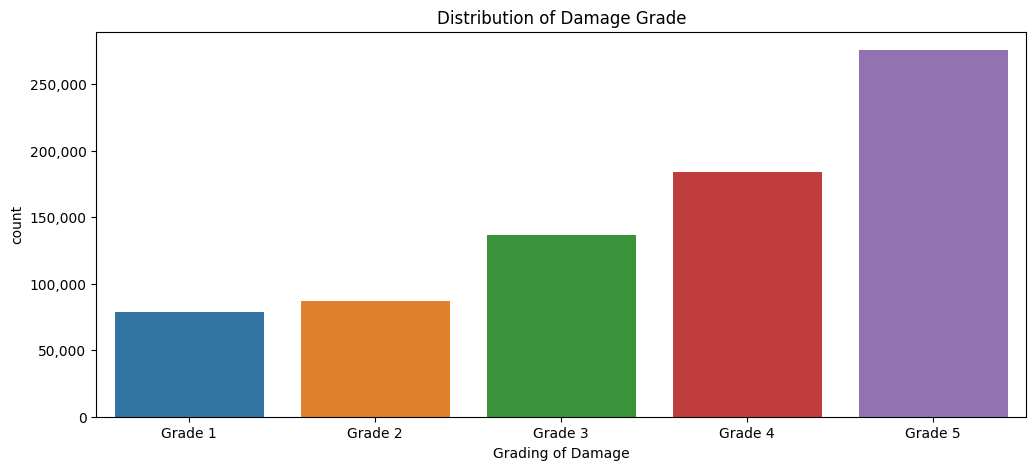

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=damage_merged_df, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade")
plt.xlabel("Grading of Damage")
plt.show()

From the above plot we can observe that a most number of buildings have experienced Grade 5 damage and least number of buildings have experienced Grade 1.

Below we're going to examine these non-numeric fields to see how they influence or are related to the way we classify the severity of damage.

In [ ]:
# view Names
damage_merged_df.select_dtypes(include=object).dtypes # Data types

land_surface_condition                   object
foundation_type                          object
roof_type                                object
ground_floor_type                        object
other_floor_type                         object
position                                 object
plan_configuration                       object
condition_post_eq                        object
damage_grade                             object
technical_solution_proposed              object
damage_overall_collapse                  object
damage_overall_leaning                   object
damage_overall_adjacent_building_risk    object
district_id                              object
vdcmun_id                                object
ward_id                                  object
legal_ownership_status                   object
district_name                            object
dtype: object

<Figure size 2000x600 with 0 Axes>

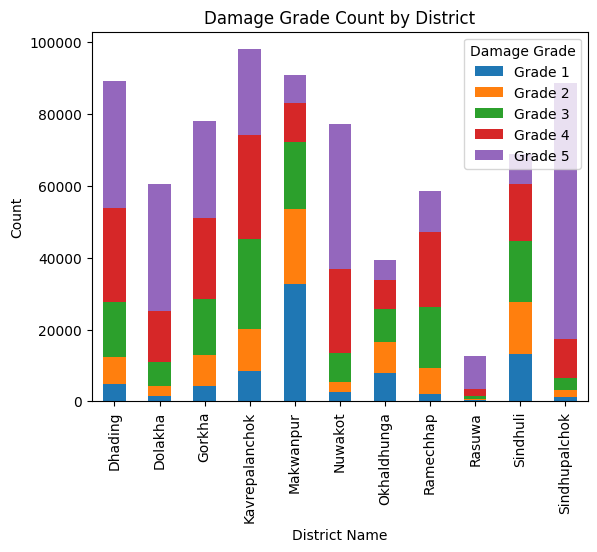

In [ ]:
# Districts with damage grade
damage_counts = damage_merged_df.groupby(['district_name', 'damage_grade']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
# Plot the counts
damage_counts.plot(kind='bar', stacked=True)
plt.title('Damage Grade Count by District')
plt.xlabel('District Name')
plt.ylabel('Count')
plt.legend(title='Damage Grade')
plt.show()

The above plot represents a stacked bar chart to demonstrate district wise damage grade of the buildings. We can see that Sindhupalchok has had the highest number of grade 5 damaged buildings.

   has_secondary_use   count
0                0.0  669729
1                1.0   92364


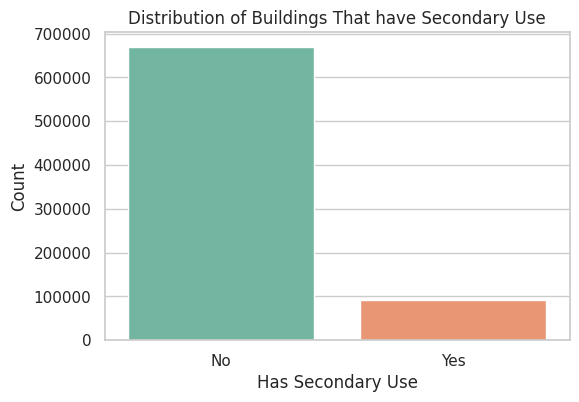

In [ ]:
# Count the occurrences of 0 and 1 in 'has_secondary_use'
count_data = damage_merged_df['has_secondary_use'].value_counts().reset_index()
count_data.columns = ['has_secondary_use', 'count']
print(count_data)
# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='has_secondary_use', y='count', data=count_data, palette='Set2')
plt.title('Distribution of Buildings That have Secondary Use')
plt.xlabel('Has Secondary Use')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

From the above graph, most of the buildings do not have secondary use which means after the damage its just a waste land.

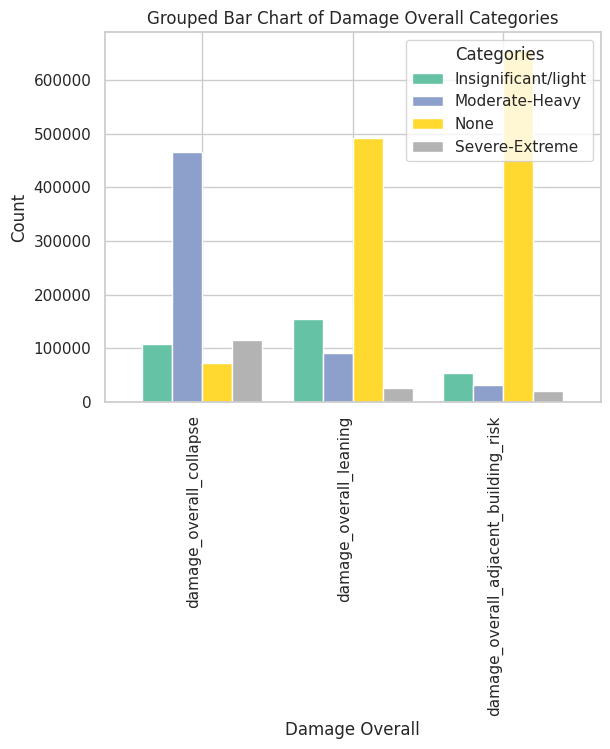

In [ ]:
count_data = damage_merged_df[[
'damage_overall_collapse',
'damage_overall_leaning',
'damage_overall_adjacent_building_risk']].apply(pd.value_counts).fillna(0).T
# Create a grouped bar chart
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', width=0.8, cmap='Set2')

# Customize the plot
plt.title('Grouped Bar Chart of Damage Overall Categories')
plt.xlabel('Damage Overall')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Categories', loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

We can see that for damage overall collapse has the highest number of buildings are with type Moderate-Heavy

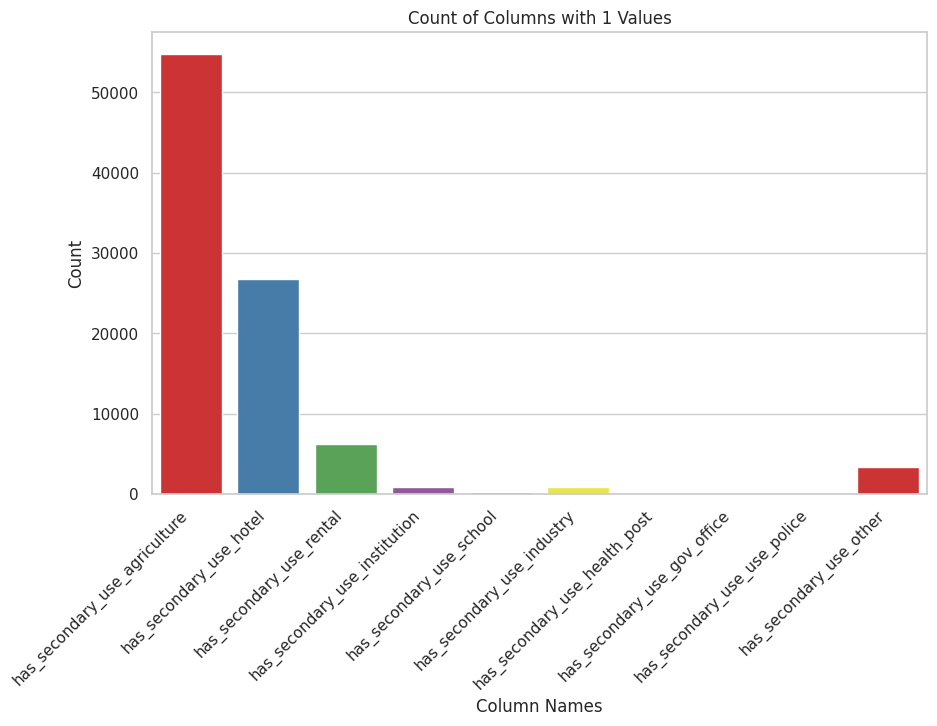

In [ ]:
value_counts_secondary = damage_merged_df[['has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental',
'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry',
'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police',
'has_secondary_use_other']].sum()

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=value_counts_secondary.index, y=value_counts_secondary.values, palette='Set1')
plt.title('Count of Columns with 1 Values')
plt.xlabel('Column Names')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

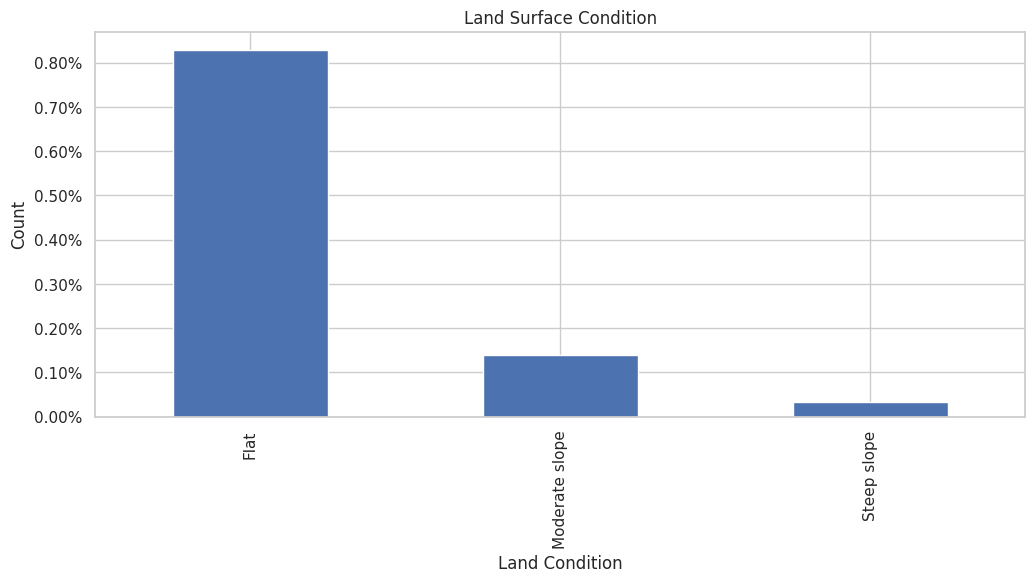

In [ ]:
# Create a plot
plt.figure(figsize=(12,5))
ax = damage_merged_df.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()



The plot shows that the majority (over 80%) of buildings are on flat land, around 15% are on moderately sloped land, and less than 5% are on severely sloped land.

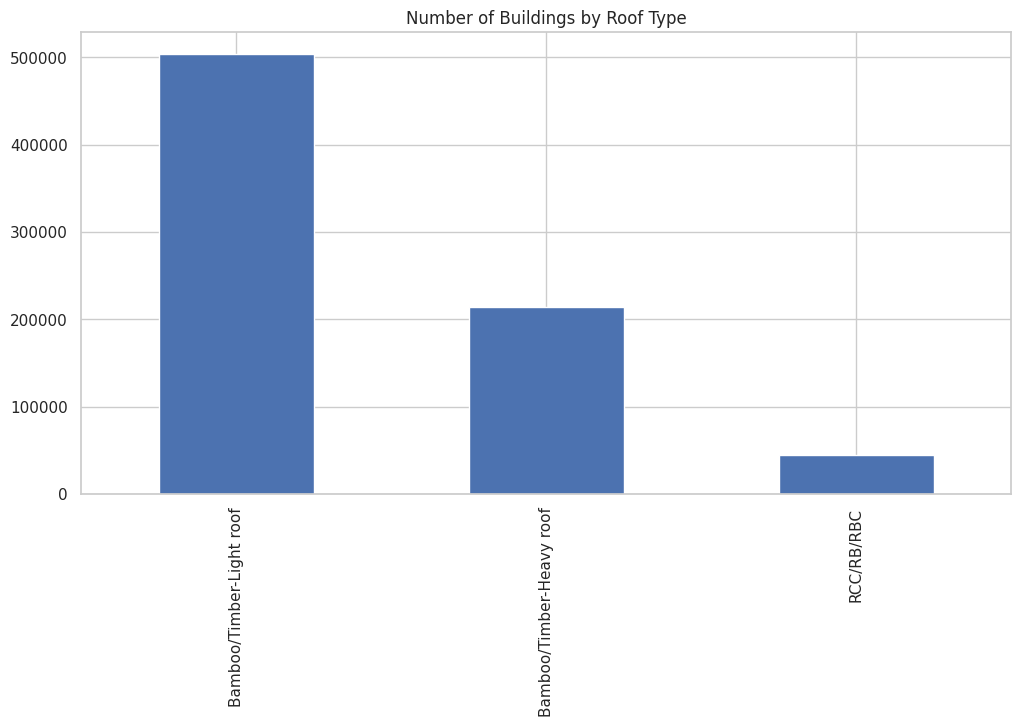

In [ ]:
plt.figure(figsize = (12,6))
ax = damage_merged_df.roof_type.value_counts().plot(kind = "bar")
plt.title("Number of Buildings by Roof Type")
plt.show()

According to the roof type variable there are three different types of roof. The vast majority of buildings have the Bamboo-Timber/ light roof, but there are still over 200k buildings with timber heavy and just 50k with RCC.

In [ ]:
damage_merged_df.position.value_counts()

Not attached       604442
Attached-1 side    129431
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

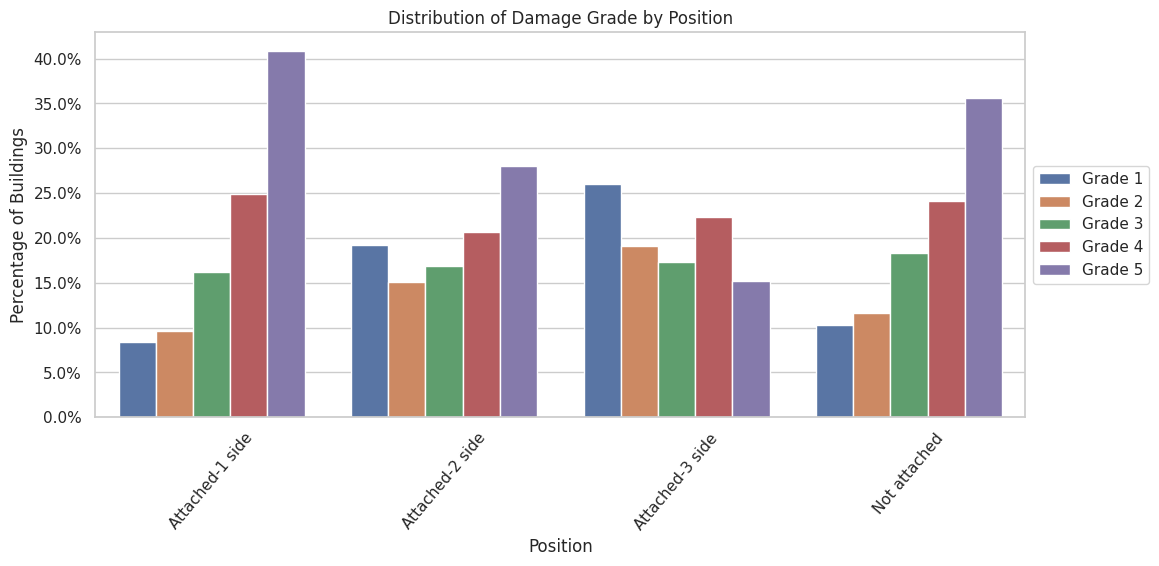

In [ ]:

# Calculate counts
df_temp = damage_merged_df.groupby(['position','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['position', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot char
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp,
                 x = 'position',
                 y = 'count',
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Position")
plt.xlabel("Position")
plt.ylabel("Percentage of Buildings")
plt.show()

When it comes to where these buildings are located, there are mainly two scenarios: they can be not attached to other structures, attached on one side, or attached on multiple sides. Interestingly, when we look at how this relates to the damage grade of the buildings, we see that buildings with no attachment and those attached on one side have somewhat similar patterns. However, buildings with attachments on two or three sides seem to behave differently from the others. So, in simple terms, most buildings aren't connected to anything else, and how they're attached or not attached seems to have varying effects on their earthquake damage.


In [ ]:
damage_merged_df.technical_solution_proposed.value_counts()

Reconstruction    470219
Major repair      129415
Minor repair      110604
No need            51855
Name: technical_solution_proposed, dtype: int64

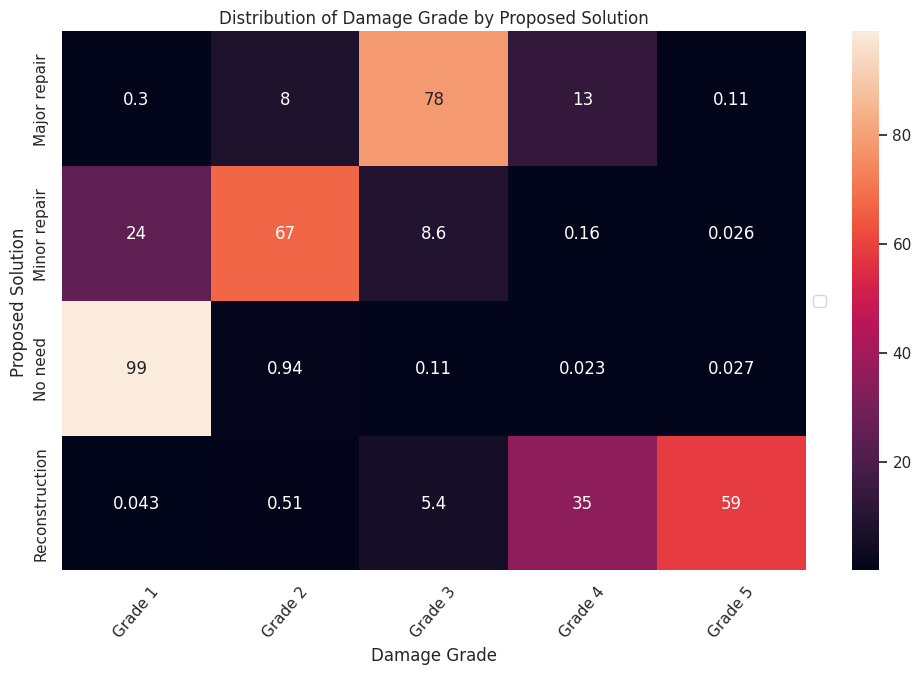

In [ ]:
# Calculate counts
df_temp = damage_merged_df.groupby(['technical_solution_proposed','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['technical_solution_proposed', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['technical_solution_proposed'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,7))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Proposed Solution")
plt.xlabel("Damage Grade")
plt.ylabel("Proposed Solution")
plt.show()

This heatmap visualizes the distribution of damage grades of buildings in relation to the proposed solutions for rectification or rebuilding post-earthquake.

For Grade 4 and 5, we do require to reconstuct the building, for grade 1, it doesn't require any change, grade 2 requires minor repair whereas when it comes to Grade 3 type of damage, we require major repair.

In [ ]:
damage_merged_df.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,district_name
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000021,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000031,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000041,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga
120101000051,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,Okhaldhunga


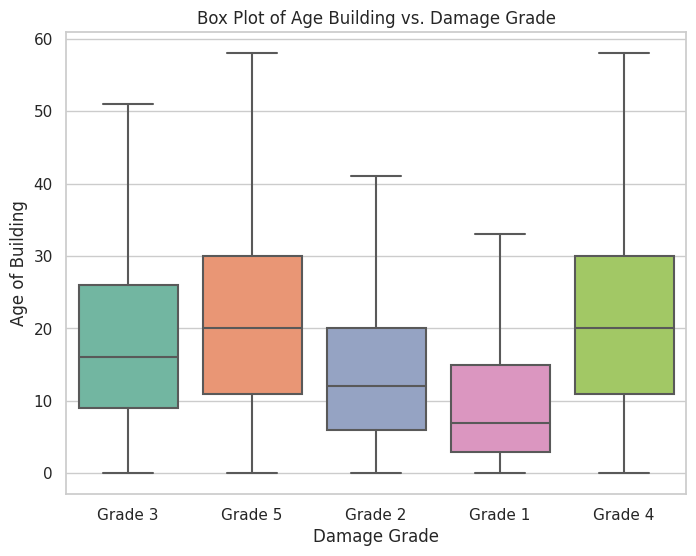

In [ ]:
df_temp = damage_merged_df[['age_building', 'damage_grade']]

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_temp, x='damage_grade', y='age_building', palette='Set2', showfliers=False)
plt.title('Box Plot of Age Building vs. Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Age of Building')
plt.show()

We can observe that buildings with grade 5 damage are of age between 11-30 and grade 4 is also similar. This supports the obvious fact that the older the building, the greater the damage.

In [ ]:
damage_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762093 entries, 120101000011 to 366709001281
Data columns (total 47 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   count_floors_pre_eq                     762093 non-null  int64  
 1   count_floors_post_eq                    762093 non-null  int64  
 2   age_building                            762093 non-null  int64  
 3   plinth_area_sq_ft                       762093 non-null  int64  
 4   height_ft_pre_eq                        762093 non-null  int64  
 5   height_ft_post_eq                       762093 non-null  int64  
 6   land_surface_condition                  762093 non-null  object 
 7   foundation_type                         762093 non-null  object 
 8   roof_type                               762093 non-null  object 
 9   ground_floor_type                       762093 non-null  object 
 10  other_floor_type           

In [ ]:
building_structure.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

# Feature Engineering

In [ ]:
damage_merged_df.columns

Index(['count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'damage_overall_collapse', 'damage_overall_leaning',
       'damage_overall_adjacent_building_risk', 'district_id', 'vdcmun_id',
       'ward_id', 'legal_ownership_status', 'count_families',
   

The above listed are the columns of the merged dataset, from which we will remove few columns which are not necessary like ID's and data collected post earthquake.

In [ ]:
model_df = damage_merged_df[['district_id','vdcmun_id','ward_id','count_floors_pre_eq','count_floors_post_eq',
                             'age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq',
                             'land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',
                             'position','plan_configuration','has_superstructure_adobe_mud',
                             'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
                             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',
                             'has_superstructure_cement_mortar_brick','has_superstructure_timber',
                            'has_superstructure_bamboo','has_superstructure_rc_non_engineered',
                             'has_superstructure_rc_engineered','has_superstructure_other','condition_post_eq',
                             'damage_grade','technical_solution_proposed']]

In [ ]:
model_df.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762093 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762093 non-null  object
 1   vdcmun_id                               762093 non-null  object
 2   ward_id                                 762093 non-null  object
 3   count_floors_pre_eq                     762093 non-null  int64 
 4   count_floors_post_eq                    762093 non-null  int64 
 5   age_building                            762093 non-null  int64 
 6   plinth_area_sq_ft                       762093 non-null  int64 
 7   height_ft_pre_eq                        762093 non-null  int64 
 8   height_ft_post_eq                       762093 non-null  int64 
 9   land_surface_condition                  762093 non-null  object
 10  foundation_type                        

In [ ]:
# New fields to add
model_df['net_rooms'] = model_df.count_floors_post_eq - model_df.count_floors_pre_eq
model_df['net_height'] = model_df.height_ft_post_eq - model_df.height_ft_pre_eq

In [ ]:
# Create training and testing data
x_train, x_test, y_train, y_test = train_test_split(model_df.drop('damage_grade', axis = 1),
                                                    model_df['damage_grade'],
                                                    test_size = 0.2,
                                                    random_state = 1989,
                                                    stratify = model_df['damage_grade'],
                                                    shuffle=True)




In [ ]:
# Target Variable Transformer
preprocessor_tar = LabelEncoder()
y_train = preprocessor_tar.fit_transform(y_train)
y_test = preprocessor_tar.fit_transform(y_test)

# Visualise Counts
pd.DataFrame(y_train).value_counts(normalize = True)

4    0.361854
3    0.241235
2    0.178996
1    0.114497
0    0.103418
dtype: float64

In [ ]:

print("Before preprocessing there were {} rows and {} columns".format(*x_train.shape))
# Identify columns
fts_cvt_obj = ['district_id', 'vdcmun_id', 'ward_id']
fts_outlier = ['age_building']
fts_cat = model_df.drop(fts_cvt_obj, axis=1).select_dtypes(include=['object']).drop('damage_grade', axis=1).columns
fts_num = model_df.select_dtypes(np.number).columns

# Convert to object function
def convert_to_object(x):
    return pd.DataFrame(x).astype(object)

# Apply convert_to_object transformation
for column in fts_cvt_obj:
    x_train[column] = convert_to_object(x_train[column])
    x_test[column] = convert_to_object(x_test[column])

# Outlier Restriction
outlier_scaler = RobustScaler(quantile_range=(0, 0.9))
x_train[fts_outlier] = outlier_scaler.fit_transform(x_train[fts_outlier])
x_test[fts_outlier] = outlier_scaler.transform(x_test[fts_outlier])

# Numerical Transformer
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
for column in fts_num:
    x_train[column] = scaler.fit_transform(x_train[column].values.reshape(-1, 1))
    x_test[column] = scaler.transform(x_test[column].values.reshape(-1, 1))
    x_train[column] = minmax_scaler.fit_transform(x_train[column].values.reshape(-1, 1))
    x_test[column] = minmax_scaler.transform(x_test[column].values.reshape(-1, 1))

# Categorical Transformer
encoder = LabelEncoder()
for column in fts_cat:
    x_train[column] = encoder.fit_transform(x_train[column])
    x_test[column] = encoder.transform(x_test[column])

# Zero or Near Zero variance
nzv = VarianceThreshold(threshold=0.01)
x_train = x_train.loc[:, nzv.fit(x_train).get_support()]
x_test = x_test.loc[:, nzv.get_support()]
x_train = np.array(x_train)
x_test = np.array(x_test)
# Print x train shape after processing
print("After preprocessing there are {} rows and {} columns".format(*x_train.shape))


Before preprocessing there were 609674 rows and 31 columns
After preprocessing there are 609674 rows and 24 columns


In [ ]:
# Define and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

# Make predictions with KNN
knn_predictions = knn_classifier.predict(x_test)



# Evaluate KNN performance
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

In [ ]:
# Define and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(x_train, y_train)

# Make predictions with Gradient Boosting
gb_predictions = gb_classifier.predict(x_test)

# Evaluate Gradient Boosting performance
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_report = classification_report(y_test, gb_predictions)

In [ ]:
# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Make predictions with Random Forest
rf_predictions = rf_classifier.predict(x_test)

# Evaluate Random Forest performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

In [ ]:
# Print the performance metrics for each classifier
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", knn_report)

print("\nGradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", gb_report)

print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

KNN Accuracy: 0.8706854132358827
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     15763
           1       0.74      0.76      0.75     17451
           2       0.76      0.76      0.76     27283
           3       0.85      0.86      0.86     36769
           4       0.98      0.96      0.97     55153

    accuracy                           0.87    152419
   macro avg       0.84      0.85      0.84    152419
weighted avg       0.87      0.87      0.87    152419


Gradient Boosting Accuracy: 0.8810187706257094
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92     15763
           1       0.79      0.85      0.82     17451
           2       0.79      0.74      0.77     27283
           3       0.80      0.91      0.85     36769
           4       1.00      0.95      0.97     55153

    accuracy                      

### Comparing the accuracy from the above models, Random Forest has the highest accuracy and it is the final Model Of Choice.

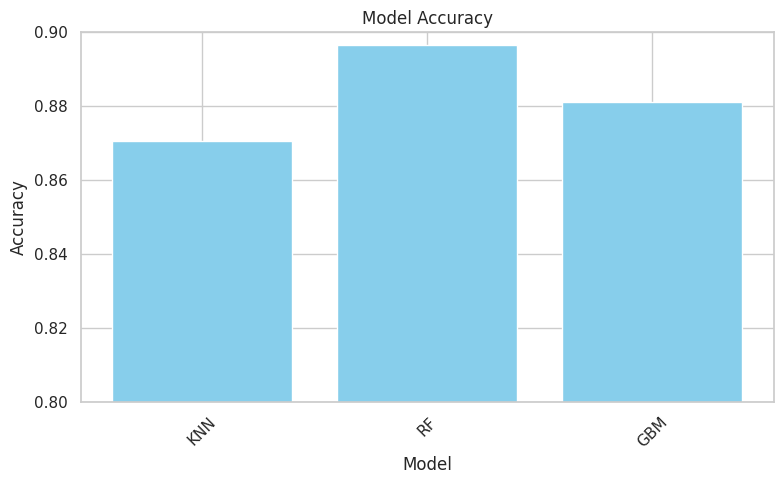

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your dictionary
model_analysis = {
    'KNN': 0.8706854132358827,
    'RF': 0.8965089654176973,
    'GBM': 0.8810187706257094
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(model_analysis.items()), columns=['Model', 'Accuracy'])

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(df['Model'], df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0.8, 0.9)  # Set the y-axis limits if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
